<a href="https://colab.research.google.com/github/Tapish0305/Credit_card_fraud/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Description of Code -
https://1drv.ms/w/c/a16accd5ef9882bf/EcA9pJsyd61JjOSON4T7veQBbzv-80z7kaorX5iamfwcUg?e=crLwpJ

ALL VARIABLE USE

df = dataframe contain original data



Not_fraud = contain sum of non-fraud classes




fraud = contain sum of fraud classes




df["Amount"]   ,     df["Time"] - Scaled data




X = contain feature dataframe




Y = target dataframe



Original_X_train , Original_X_test , Original_Y_train , Original_Y_test  =
training and testing scaled data




df_fraud - dataframe contain fraud data




df_notfraud - dataframe contain notfraud data ## both are equal in number df_fraud and df_notfraud



new_df = Balanced data


X,Y - new data frame target and feature value

X_new - dimentionality reduced data

X_train, Xtest......  =  Training and testing data of this new data frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,  cross_val_score, learning_curve, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_error, precision_recall_curve

#********  MODELS    ************#

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [96]:
df = pd.read_csv("/content/creditcard.csv")

In [97]:
## Calling top 5 index
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [98]:
## shape of the data frame
df.shape

(284807, 31)

In [99]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [101]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [102]:
Not_fraud = (df['Class']==0).sum()
fraud = (df['Class']==1).sum()

In [103]:
print("NOT FRAUD",Not_fraud)
print("FRAUD",fraud)

NOT FRAUD 284315
FRAUD 492


In [104]:
df["Amount"].values.shape

(284807,)

In [105]:
# ******** SCALING THE DATA ******** #
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1,1))

In [106]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [107]:
X = df.drop("Class",axis=1)
Y = df["Class"]

In [108]:
# ***********   THIS IS WAY OF IMPLEMENTING CROSS VALIDATION BY MYSELF  *********** #
sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False )

for train_index, test_index in sss.split(X,Y):
  Original_X_train = X.iloc[train_index] ## SCALED DATA
  Original_X_test = X.iloc[test_index]
  Original_Y_train = Y.iloc[train_index]
  Original_Y_test = Y.iloc[test_index]
  print("***************************************************************************************************")

***************************************************************************************************
***************************************************************************************************
***************************************************************************************************
***************************************************************************************************
***************************************************************************************************


In [109]:
Original_Y_train.shape

(227846,)

In [110]:
df_notfraud = df[df["Class"]==0]
df_fraud = df[df["Class"]==1]
random_indices = random.sample(range(len(df_notfraud)),len(df_fraud))
df_notfraud = df_notfraud.iloc[random_indices]

In [111]:
df_notfraud.shape

(492, 31)

In [112]:
new_df = pd.concat([df_fraud, df_notfraud],axis=0)

In [113]:
new_df =  new_df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [114]:
new_df.shape

(984, 31)

In [115]:
corr = new_df.corr()

<Axes: >

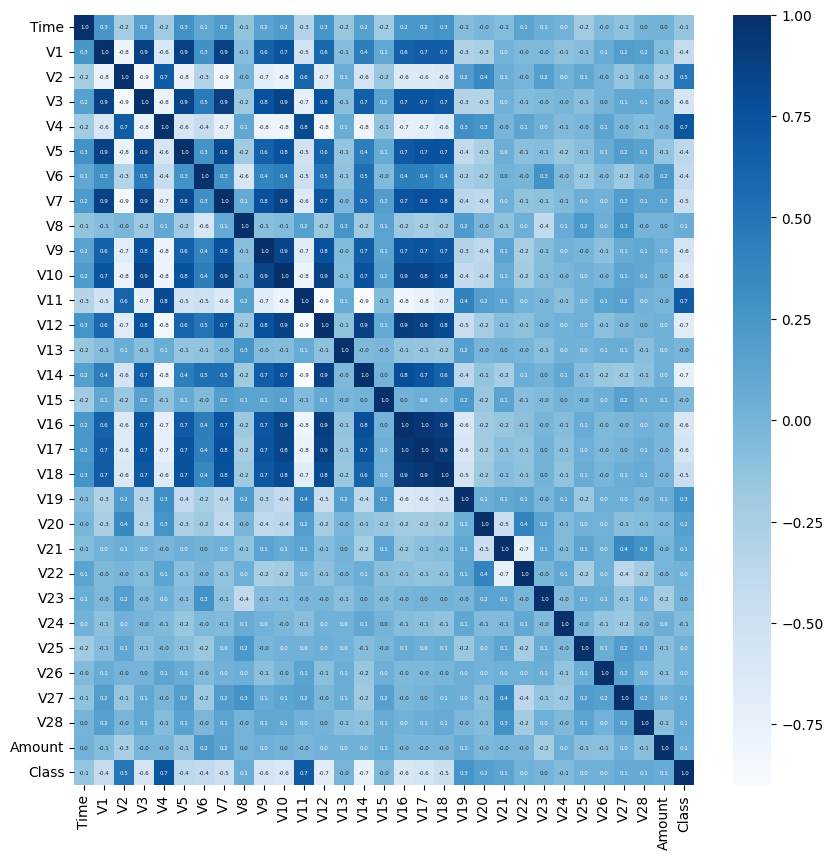

In [116]:
#***********   HEATMAP     ***************#
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap = 'Blues', annot = True, fmt = '.1f', cbar=True,annot_kws={'size':4} )

In [117]:
new_df.shape

(984, 31)

In [118]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,-1.140326,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,-0.349231,1
980,-0.211103,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,1.063412,1
981,-0.777456,-0.856493,0.279514,1.270488,1.267953,0.654813,0.292744,0.251460,0.355886,-0.368661,...,0.052287,0.213805,0.007452,-0.329144,-0.068180,-0.218318,0.385806,0.202081,-0.138412,0
982,1.165012,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,-0.153325,1
983,-1.213923,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.304013,1


In [119]:
## Removing outliers V14
v14_fraud = new_df[new_df["Class"]==1]
v14_fraud = v14_fraud["V14"]
q25, q75 = np.percentile(v14_fraud,25) , np.percentile(v14_fraud,75)
iqr = q75 - q25
v14_lower, v14_higher = q25 - 1.5*iqr , q75 + 1.5*iqr

outlier = [x for x in v14_fraud if x < v14_lower or x > v14_higher]
new_df = new_df.drop(new_df[(new_df['V14'] > v14_higher) | (new_df['V14'] < v14_lower)].index)
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_higher))
print('V14 outliers: {}'.format(outlier))
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outlier)))
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)
## Removing outliers V12
v12_fraud = new_df[new_df["Class"]==1]
v12_fraud = v12_fraud["V12"]
q25, q75 = np.percentile(v12_fraud,25) , np.percentile(v12_fraud,75)
iqr = q75 - q25
v12_lower, v12_higher = q25 - 1.5*iqr , q75 + 1.5*iqr

outlier = [x for x in v12_fraud if x < v12_lower or x > v12_higher]
new_df = new_df.drop(new_df[(new_df['V12'] > v12_higher) | (new_df['V12'] < v12_lower)].index)
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_higher))
print('V12 outliers: {}'.format(outlier))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outlier)))
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)
#Removing outlier V10
v10_fraud = new_df[new_df["Class"]==1]
v10_fraud = v10_fraud["V10"]
q25, q75 = np.percentile(v10_fraud,25) , np.percentile(v10_fraud,75)
iqr = q75 - q25
v10_lower, v10_higher = q25 - 1.5*iqr , q75 + 1.5*iqr

outlier = [x for x in v10_fraud if x < v10_lower or x > v10_higher]
new_df = new_df.drop(new_df[(new_df['V10'] > v10_higher) | (new_df['V10'] < v10_lower)].index)
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_higher))
print('V10 outliers: {}'.format(outlier))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outlier)))
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 outliers: [-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.0499976898594]
Feature V14 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 980
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.4311310279993, -18.0475965708216, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-18.2711681738888, -24.5882624372475, -15.3460988468775, -19.836148851696, -14.9246547735487, -1

In [120]:
X = new_df.drop('Class', axis = 1)
Y = new_df["Class"]

In [121]:
#**********************    DIMENTIONALITY REDUCTION     *********************#
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)

In [122]:
X_new.shape

(946, 2)

In [123]:
X_new

array([[ 8.19300968,  1.1335357 ],
       [-2.19998859, -3.60690723],
       [ 7.86563156,  2.22834639],
       ...,
       [ 7.97689801,  1.23034024],
       [-0.72401477, -2.72061375],
       [-2.77963462, -0.32786359]])

<function matplotlib.pyplot.show(close=None, block=None)>

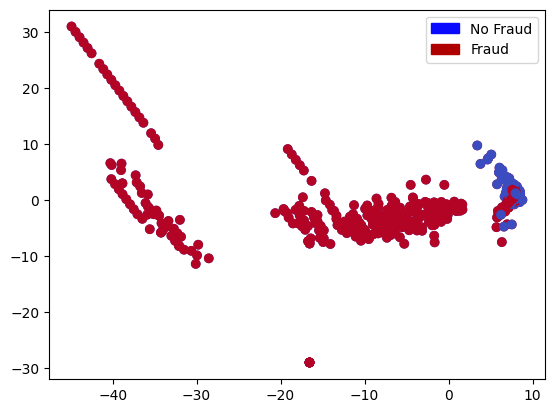

In [124]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
fig, ax = plt.subplots()
ax.scatter(X_new[:,0],X_new[:,1],cmap = 'coolwarm',c = (Y==0), label = "NOT FRAUD")
ax.scatter(X_new[:,0],X_new[:,1],cmap = 'coolwarm',c = (Y==1), label = "FRAUD")
ax.legend(handles=[blue_patch, red_patch])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

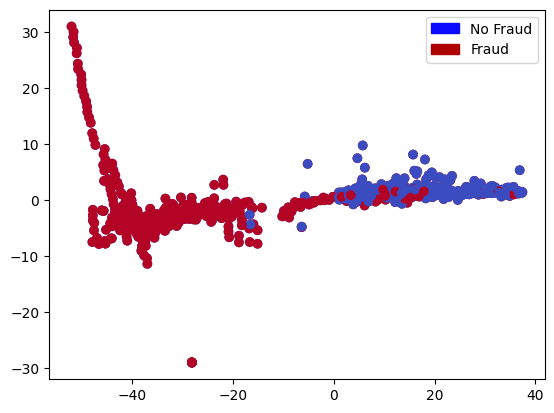

In [125]:
tsne = TSNE(n_components = 2)
X_new_1 = tsne.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_new_1[:,0],X_new[:,1],cmap = 'coolwarm',c = (Y==0), label = "NOT FRAUD")
ax.scatter(X_new_1[:,0],X_new[:,1],cmap = 'coolwarm',c = (Y==1), label = "FRAUD")
ax.legend(handles=[blue_patch, red_patch])
plt.show

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y, test_size = 0.2, random_state = 42)

In [127]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

In [128]:
Y_pred = []
for key,classi in classifier.items():
  classi.fit(X_train, Y_train)
  training_score = cross_val_score(classi, X_train, Y_train, cv=5)
  train_score = round(training_score.mean(), 2) * 100
  Y_pred.append(classi.predict(X_test))
  print("Classifiers: ",key,"\n Training scores: ",train_score)

Classifiers:  Logistic Regression 
 Training scores:  92.0
Classifiers:  Decision Tree 
 Training scores:  90.0
Classifiers:  Random Forest 
 Training scores:  93.0
Classifiers:  KNN 
 Training scores:  92.0


In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your dataset
# X = df.drop(columns=["target"])  # Replace "target" with the actual target column
# y = df["target"]

# Simulating some dataset for demonstration
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models and hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000, solver="liblinear"),
        "params": {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {"criterion": ["gini", "entropy"], "max_depth": [3, 5, 10], "min_samples_leaf": [1, 2, 4]}
    },
    "SVM": {
        "model": SVC(max_iter=10000),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7], "algorithm": ["auto", "ball_tree", "kd_tree"]}
    }
}

# Perform GridSearchCV
best_models = {}
for name, model_info in models.items():
    clf = GridSearchCV(model_info["model"], model_info["params"], cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_

    # Evaluate
    y_pred = clf.best_estimator_.predict(X_test)
    print(f"Best {name} Parameters: {clf.best_params_}")
    print(f"Best {name} Score: {accuracy_score(y_test, y_pred):.4f}\n")


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Logistic Regression Score: 0.8700

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
Best Decision Tree Score: 0.8750

Best SVM Parameters: {'C': 0.1, 'kernel': 'linear'}
Best SVM Score: 0.8800

Best KNN Parameters: {'algorithm': 'auto', 'n_neighbors': 7}
Best KNN Score: 0.8050



In [130]:
##  cross validation score
log_reg_score = cross_val_score(LogisticRegression(), X_train , Y_train, cv=5) ## Logistic Regression
cross_val_score_log_reg = round(log_reg_score.mean()*100,2)

KNN_score = cross_val_score(KNeighborsClassifier(), X_train , Y_train, cv=5) ## KNN
cross_val_score_KNN = round(KNN_score.mean()*100,2)

SVC_score = cross_val_score(SVC(), X_train , Y_train, cv=5) ## SVC
cross_val_score_SVC = round(SVC_score.mean()*100,2)

DTC_score = cross_val_score(DecisionTreeClassifier(), X_train , Y_train, cv=5) ## Logistic Regression
cross_val_score_DTC = round(DTC_score.mean()*100,2)

# In this section we are going back to initial dataframe.
Step 1  - split data frame into target and feature undersample_X and undersample_Y


Step 2 - split the  target and feature dataframe into training and testing data
Undersample_Xtrain , Undersample_Xtest, undersample_Ytest, undersample_Ytrain


Step 3 -

a. Now we exact the train and test part of undersample_X , undersample_Y dataset.

b. In this step we created a pipeline that uses NearMiss technique which undersample the majority part in the data equal to the length of minority part
and then use this updated dataset to train the model.

c. fitted the model with training part of the undersample_Xtrain, undersample_Ytrain data.

d. predict the model wih testing part of the undersample_Xtrain and undersample_Ytrain


Step 4 -

a. undersample_pipeline.score(): This is calling the score method of the undersample_pipeline object. This method is typically used to calculate the accuracy of a machine learning model on a given dataset.

b. find precision_score , recall score, roc-auc score, f1 score on testing part of undersample prediction(data which is prediction on testing part of undersample_Xtrain which is balanced) and Original_Ytrain[test] (which is the testing part of Y(scaled and imbalanced) )

In [156]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define Stratified K-Fold cross-validation
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define features and target
undersample_X = df.drop("Class", axis=1)
undersample_Y = df["Class"]

# Splitting the dataset
for train_index, test_index in sss.split(undersample_X, undersample_Y):
    undersample_X_train = undersample_X.iloc[train_index]
    undersample_Y_train = undersample_Y.iloc[train_index]
    undersample_X_test = undersample_X.iloc[test_index]
    undersample_Y_test = undersample_Y.iloc[test_index]

# Initialize metric lists
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Cross-validation loop
for train, test in sss.split(undersample_X_train, undersample_Y_train):
    # Apply NearMiss for undersampling
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), LogisticRegression())

    # Convert to DataFrame to keep feature names
    X_train_df = pd.DataFrame(undersample_X_train.iloc[train], columns=undersample_X.columns)
    X_test_df = pd.DataFrame(undersample_X_train.iloc[test], columns=undersample_X.columns)

    # Fit the model
    undersample_model = undersample_pipeline.fit(X_train_df, undersample_Y_train.iloc[train])

    # Make predictions
    undersample_prediction = undersample_model.predict(X_test_df)

    # Evaluate metrics
    undersample_accuracy.append(undersample_pipeline.score(X_test_df, undersample_Y_train.iloc[test]))
    undersample_precision.append(precision_score(undersample_Y_train.iloc[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_Y_train.iloc[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_Y_train.iloc[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_Y_train.iloc[test], undersample_prediction))

# Print final results
print('---' * 15)
print(f"Accuracy: {np.mean(undersample_accuracy):.4f}")
print(f"Precision: {np.mean(undersample_precision):.4f}")
print(f"Recall: {np.mean(undersample_recall):.4f}")
print(f"F1 Score: {np.mean(undersample_f1):.4f}")
print(f"AUC-ROC: {np.mean(undersample_auc):.4f}")
print('---' * 15)


---------------------------------------------
Accuracy: 0.5355
Precision: 0.0035
Recall: 0.9364
F1 Score: 0.0070
AUC-ROC: 0.7356
---------------------------------------------


# LEARNING CURVE

The Learning curve give us the graphical representation of performance of model with respect to training data or time spent training.

X axis = Training size and Y axis = performance metrics.

Step 1 = Creating ther structure of four figures

step 2 = We get the value of train sizes which is used for x-axis and training and testing scores on data X_train and Y_train

step 3 = Used to find the upper and lower limit of training score and test score and shade that part using fill_between.

step 4 = Next we plot the train sizes on x data and train score and test score mean on the y-axis

These above step is repeated for all the estimator.

In [132]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): ## ylim is used to get the y axis limit of the plot
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True) ## display four figures of learning curve
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124") ## This function shades between two boundaries
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=1.0, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

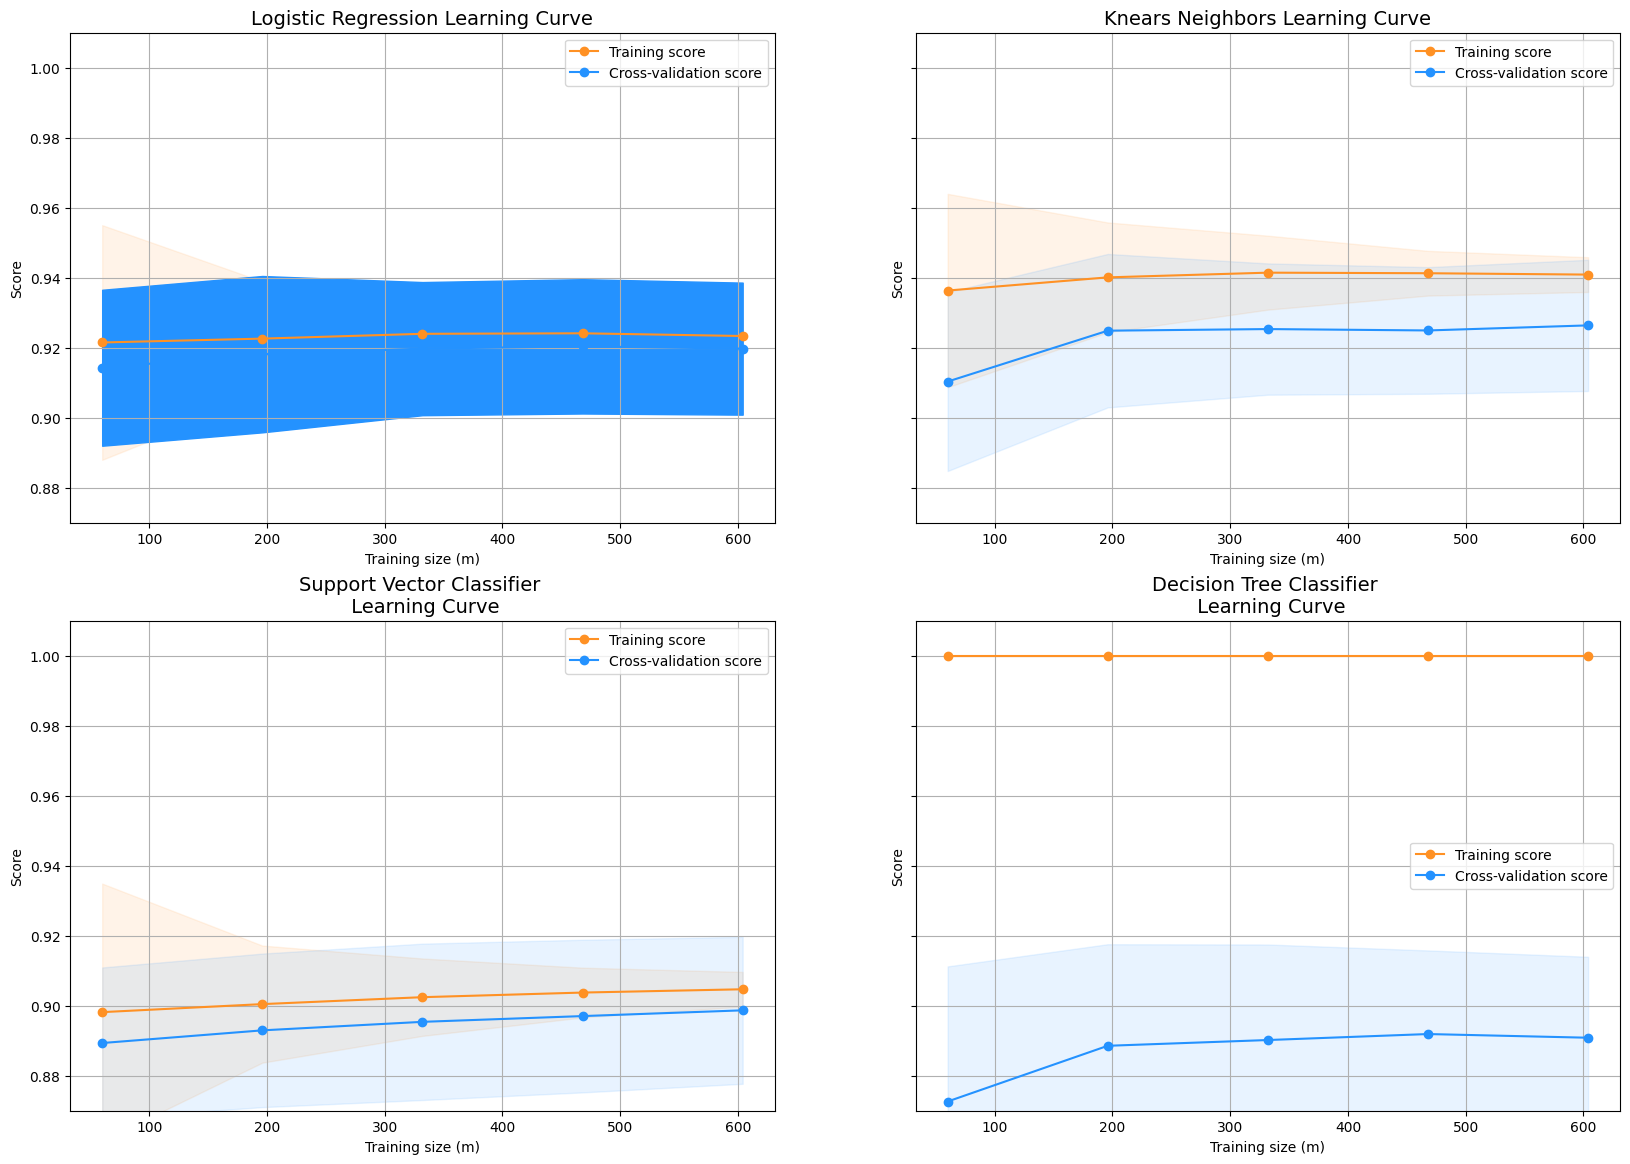

In [133]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
svc = SVC()
plot_learning_curve(log_reg, k_near, svc, tree_clf, X_train, Y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [134]:
log_reg_prd = cross_val_predict(log_reg, X_train, Y_train, cv=5, method = 'decision_function')
## About decision function read on onenote

knears_prd = cross_val_predict(k_near, X_train , Y_train, cv=5)

svc_prd = cross_val_predict(svc, X_train, Y_train, cv=5,
                             method="decision_function")

tree_prd = cross_val_predict(tree_clf, X_train, Y_train, cv=5)

In [135]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(Y_train, log_reg_prd))## measure the AUC of ROC curve refer notes and onernote/book
print('KNears Neighbors: ', roc_auc_score(Y_train, knears_prd))
print('Support Vector Classifier: ', roc_auc_score(Y_train, svc_prd))
print('Decision Tree Classifier: ', roc_auc_score(Y_train, tree_prd))

Logistic Regression:  0.9706212155191746
KNears Neighbors:  0.9197409733124018
Support Vector Classifier:  0.9691354563803543
Decision Tree Classifier:  0.9031593406593406


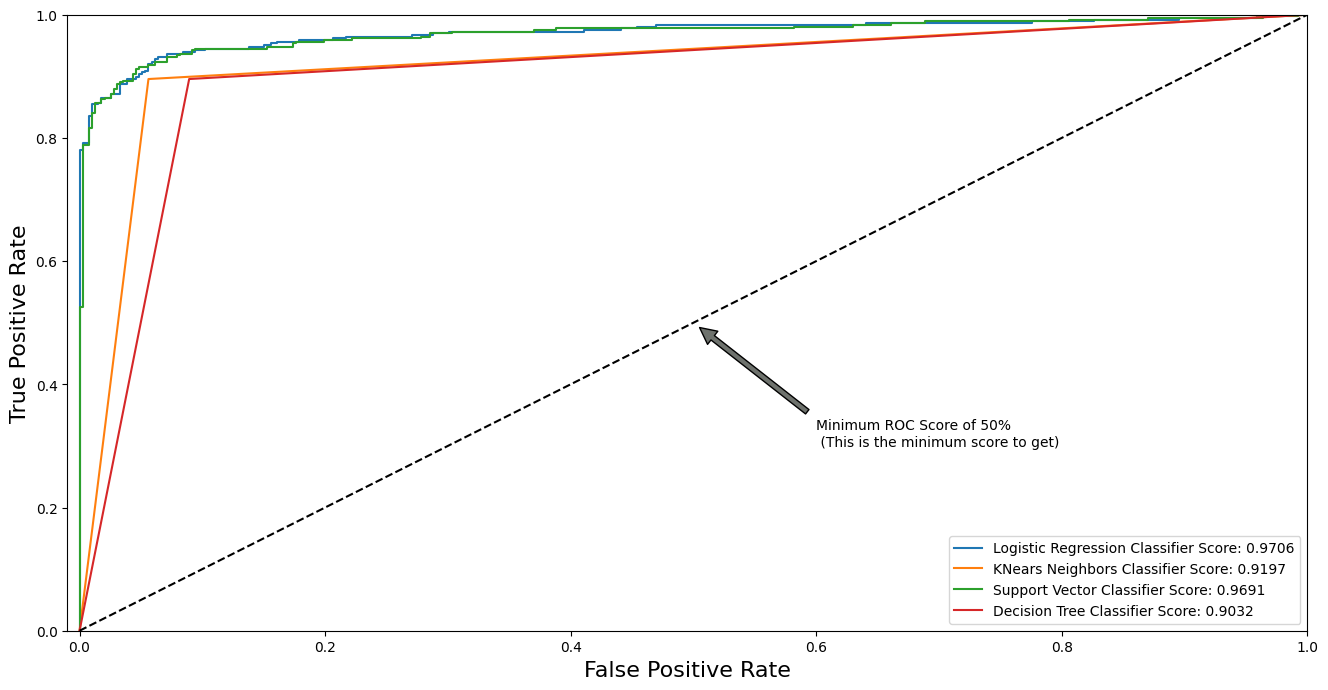

In [136]:
## PLOTTING ROC-AUC CURVE
log_fpr, log_tpr, log_thresold = roc_curve(Y_train, log_reg_prd)
knear_fpr, knear_tpr, knear_threshold = roc_curve(Y_train, knears_prd)
svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_train, svc_prd)
tree_fpr, tree_tpr, tree_threshold = roc_curve(Y_train, tree_prd)

def graph_roc_curve(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
  plt.figure(figsize = (16,8))
  plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, log_reg_prd)))
  plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, knears_prd)))
  plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, svc_prd)))
  plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, tree_prd)))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1, 0, 1]) ## [xmin, xmax, ymin, ymax]
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
               arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
  plt.legend()

graph_roc_curve(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

LOGISTIC REGRESSION DEEP LOOK

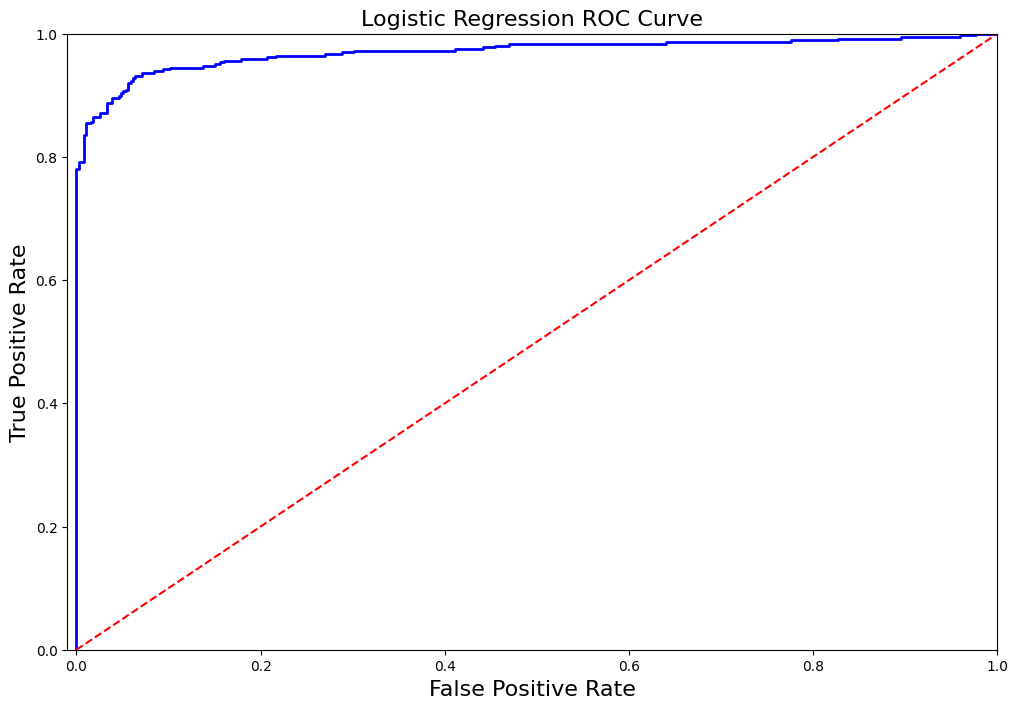

In [137]:
## ROC AUC CURVE OF LOGISTIC REGRESSION
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [138]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(Y_train, log_reg_prd)
## precision recall curve n cross validation predictiona nd Original scaled value Y train

In [139]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(Y_train, y_pred)))## Both are scaled data
print('Precision Score: {:.2f}'.format(precision_score(Y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(Y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy))) ## BALANCED DATA + SCALED DATA AND SCALED DATA
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.86
Precision Score: 0.97
F1 Score: 0.91
Accuracy Score: 0.92
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.63
Precision Score: 0.00
Recall Score: 0.94
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [140]:
undersample_Y_score = log_reg.decision_function(pca.transform(Original_X_test))

In [141]:
from sklearn.metrics import average_precision_score
undersample_average_precision = average_precision_score(Original_Y_test, undersample_Y_score )
print("undersample Average precision {}".format(undersample_average_precision))

undersample Average precision 0.7647116820778332


Text(0.5, 1.0, 'Precision - Recall  Curve')

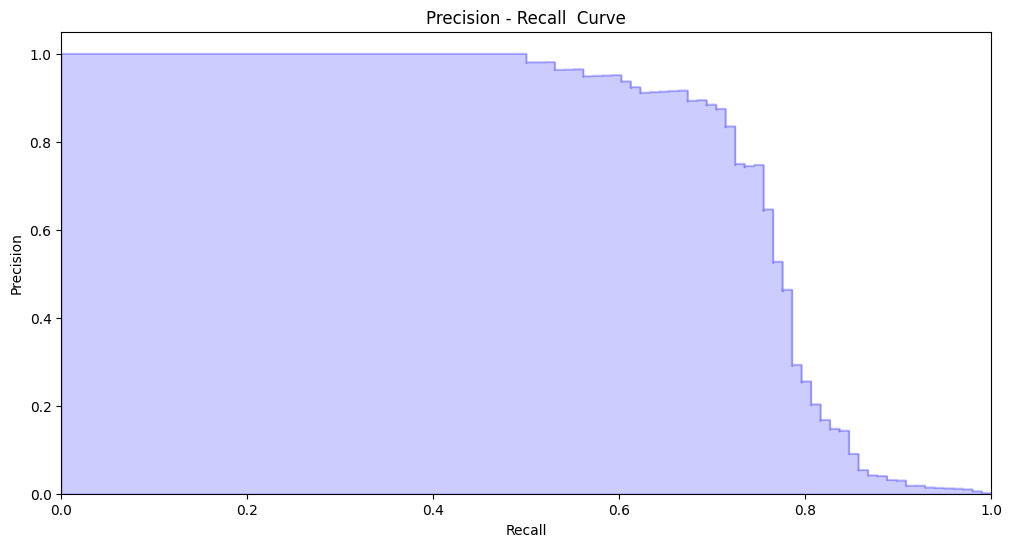

In [142]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,6))

precision, recall, thresold = precision_recall_curve(Original_Y_test, undersample_Y_score)
plt.step(recall, precision, color = 'blue', alpha = 0.2, where = 'post')
plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision - Recall  Curve')

   Cross validation before oversampling. See one notes
   We are applying SMOTE technique (one notes) on scaled data

In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(Original_X_train), len(Original_Y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(Original_X_test), len(Original_Y_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear']  # Only liblinear supports both l1 and l2
}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
for train, test in sss.split(Original_X_train, Original_Y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    # Creating a Pipeline which applied SMOTE technique and then trained the model
    model = pipeline.fit(Original_X_train.iloc[train], Original_Y_train.iloc[train])
    ## We are applying this pipeline only on  scaled training data which balanced the data
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(Original_X_train.iloc[test])

    accuracy_lst.append(pipeline.score(Original_X_train.iloc[test], Original_Y_train.iloc[test]))
    precision_lst.append(precision_score(Original_Y_train.iloc[test], prediction))
    recall_lst.append(recall_score(Original_Y_train.iloc[test], prediction))
    f1_lst.append(f1_score(Original_Y_train.iloc[test], prediction))
    auc_lst.append(roc_auc_score(Original_Y_train.iloc[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9604560696460366
precision: 0.060014550936018304
recall: 0.9111976630963973
f1: 0.11115442447774995
---------------------------------------------------------------------------------------------------------------------------------------


In [148]:
y_score = best_est.decision_function(Original_X_test)
average_precision = average_precision_score(Original_Y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.75')

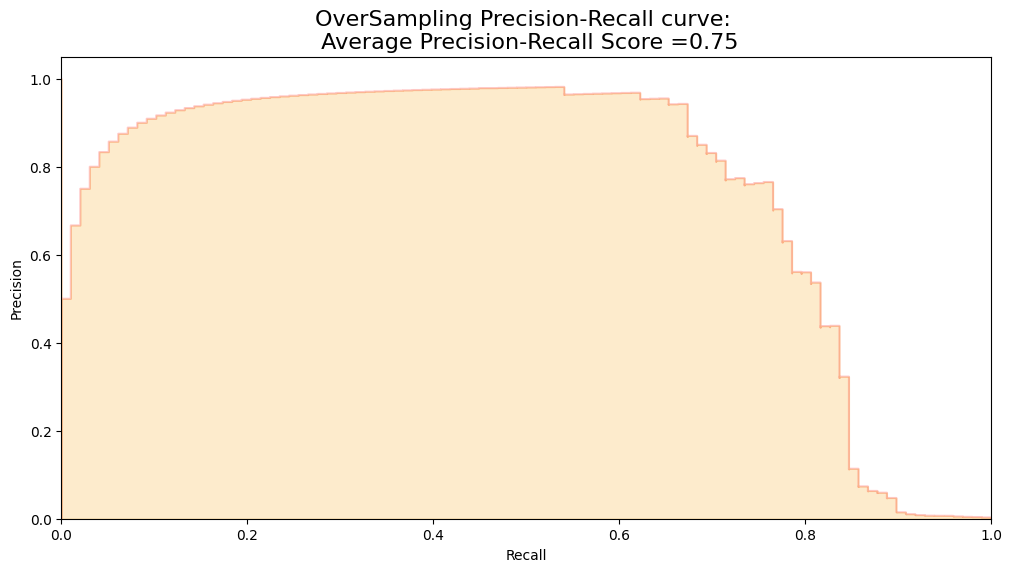

In [149]:
## PRECISION RECALL CURVE
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(Original_Y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

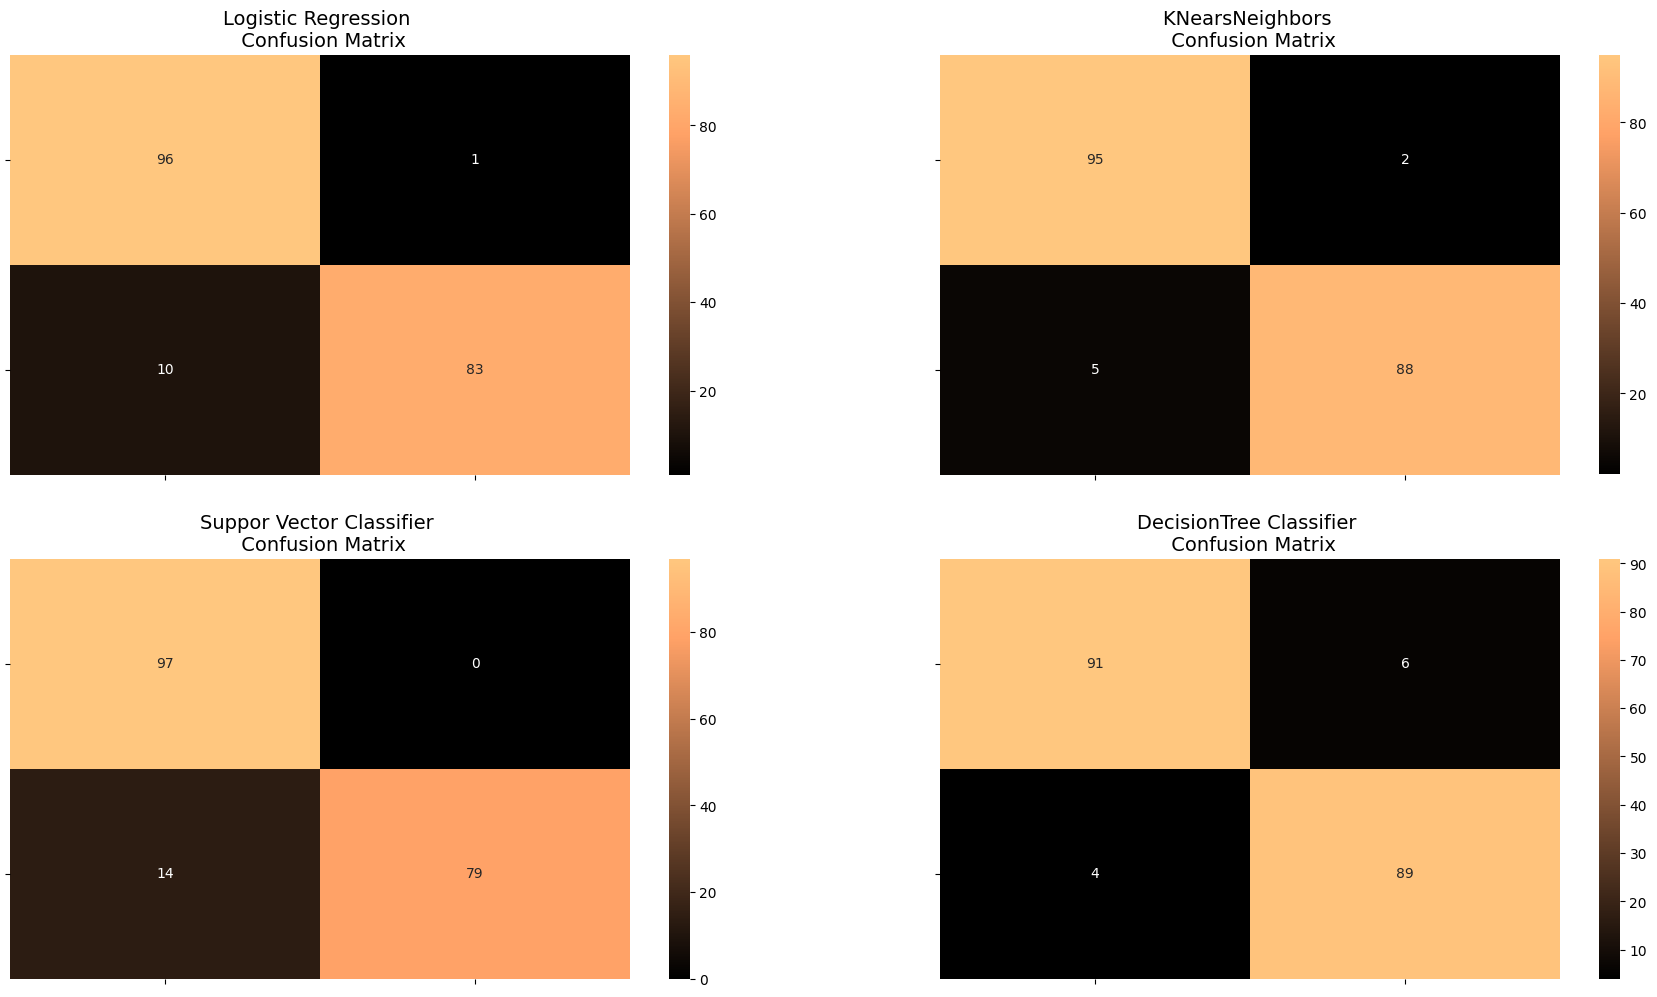

In [150]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
k_near.fit(X_train, Y_train)
y_pred_knear = k_near.predict(X_test)
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(Y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(Y_test, y_pred_knear)
svc_cf = confusion_matrix(Y_test, y_pred_svc)
tree_cf = confusion_matrix(Y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [151]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(Y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(Y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(Y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(Y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        97
           1       0.99      0.89      0.94        93

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        97
           1       0.98      0.95      0.96        93

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        97
           1       1.00      0.85      0.92        93

    accuracy                           0.93       190
   macro avg       0.94      0.92      0.93       190
weighted